In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

dataset_name = "music4all"
dataset_relative_location = "../../dataset"

dataset_path = Path(dataset_relative_location) / dataset_name

datasets = {}

csvsPattern = "*.csv"
csvs = list(dataset_path.glob(csvsPattern))
csvs

for csv in csvs:
    datasets[csv.stem] = pd.read_csv(csv, delimiter="\t")

# Taking a look at the datasets we have
datasets.keys()

dict_keys(['id_tags', 'id_metadata', 'id_information', 'listening_history', 'id_lang', 'id_genres'])

In [2]:
df_with_disruption = pd.read_csv(Path("./dataset") / "output" / "csv_with_disruption" / "song_info_with_disruption_26119_feat_transfer_learning_gamma_0.1.csv")
df_with_disruption = df_with_disruption.drop(columns=["Unnamed: 0", "index", "mapping_to_fv_index"])

In [3]:
listening_history = datasets["listening_history"].copy(deep=True)
listening_history.head()

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09


## Artistas Mais Disruptivos

In [5]:
pd.DataFrame(df_with_disruption.groupby("artist").sum().sort_values(["disruption", "ni"], ascending=False)["disruption"][:30])

,disruption
artist,
Pink Floyd,12.506460
Bob Dylan,12.131466
The Beatles,11.538598
Nine Inch Nails,10.785303
Queen,10.236421
Billie Holiday,10.012744
Elvis Presley,9.895473
Frank Sinatra,9.428637
Björk,8.882425


## Artistas mais consolidadores

In [182]:
pd.DataFrame(df_with_disruption.groupby("artist").sum().sort_values(["disruption"], ascending=False).sort_values(["disruption"], ascending=True)["disruption"][:30])

,disruption
artist,
Tamia,-1.049546
Miguel,-1.017970
The Whispers,-1.016034
Celldweller,-1.015315
Noah and the Whale,-1.014037
The Soft Moon,-1.008736
Alaska Thunderfuck,-1.004303
90sFlav,-1.000000
Derek & The Dominos,-1.000000


## Músicas mais disruptivas

In [183]:
df_with_disruption.sort_values(["disruption", "ni"], ascending=False)[["artist", "song", "disruption", "release"]][:15]

,artist,song,disruption,release
243,The Beatles,Think For Yourself - Remastered 2009,1.0,1965
99,Eddie Cochran,Somethin' Else,1.0,1960
43,Chuck Berry,Together (We'll Always Be),1.0,1957
321,Marvin Gaye,It Takes Two,1.0,1966
1592,The Boys,I Don't Care,1.0,1977
2012,Thin Lizzy,Killer on the Loose,1.0,1980
1408,Thin Lizzy,Johnny,1.0,1976
867,Pink Floyd,The Gold It's in the...,1.0,1972
1113,Brian Eno,Baby's on Fire,1.0,1973
185,Dusty Springfield,Wishin' And Hopin',1.0,1964


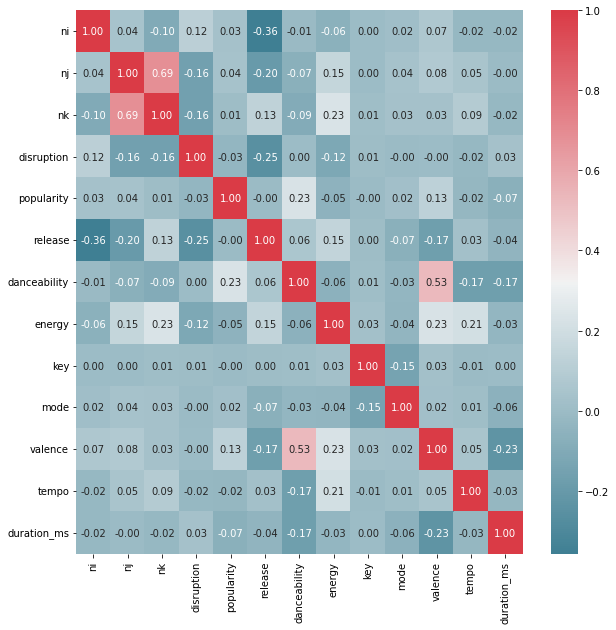

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

def heatMap(df, mirror):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(10, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)

   # show plot
   plt.show()


heatMap(df_with_disruption, True)

Podemos ver uma correlação negativa quase moderada (-0.25) entre a disrupção e o ano, ou seja, músicas precursoras/antigas em seus respectivos estilos foram mais disruptivas.

Assim como a correlação negativa fraca com o $n_{j}$ e o $n_{k}$ faz sentido, já que ambos estão no denominador no cálculo da disrupção.

Há também interessantemente uma correlação fraca negativa em relação à energia da música. A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade. 

Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto o prelúdio de Bach tem pontuação baixa nessa escala. 
As características perceptivas que contribuem para este atributo incluem gama dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

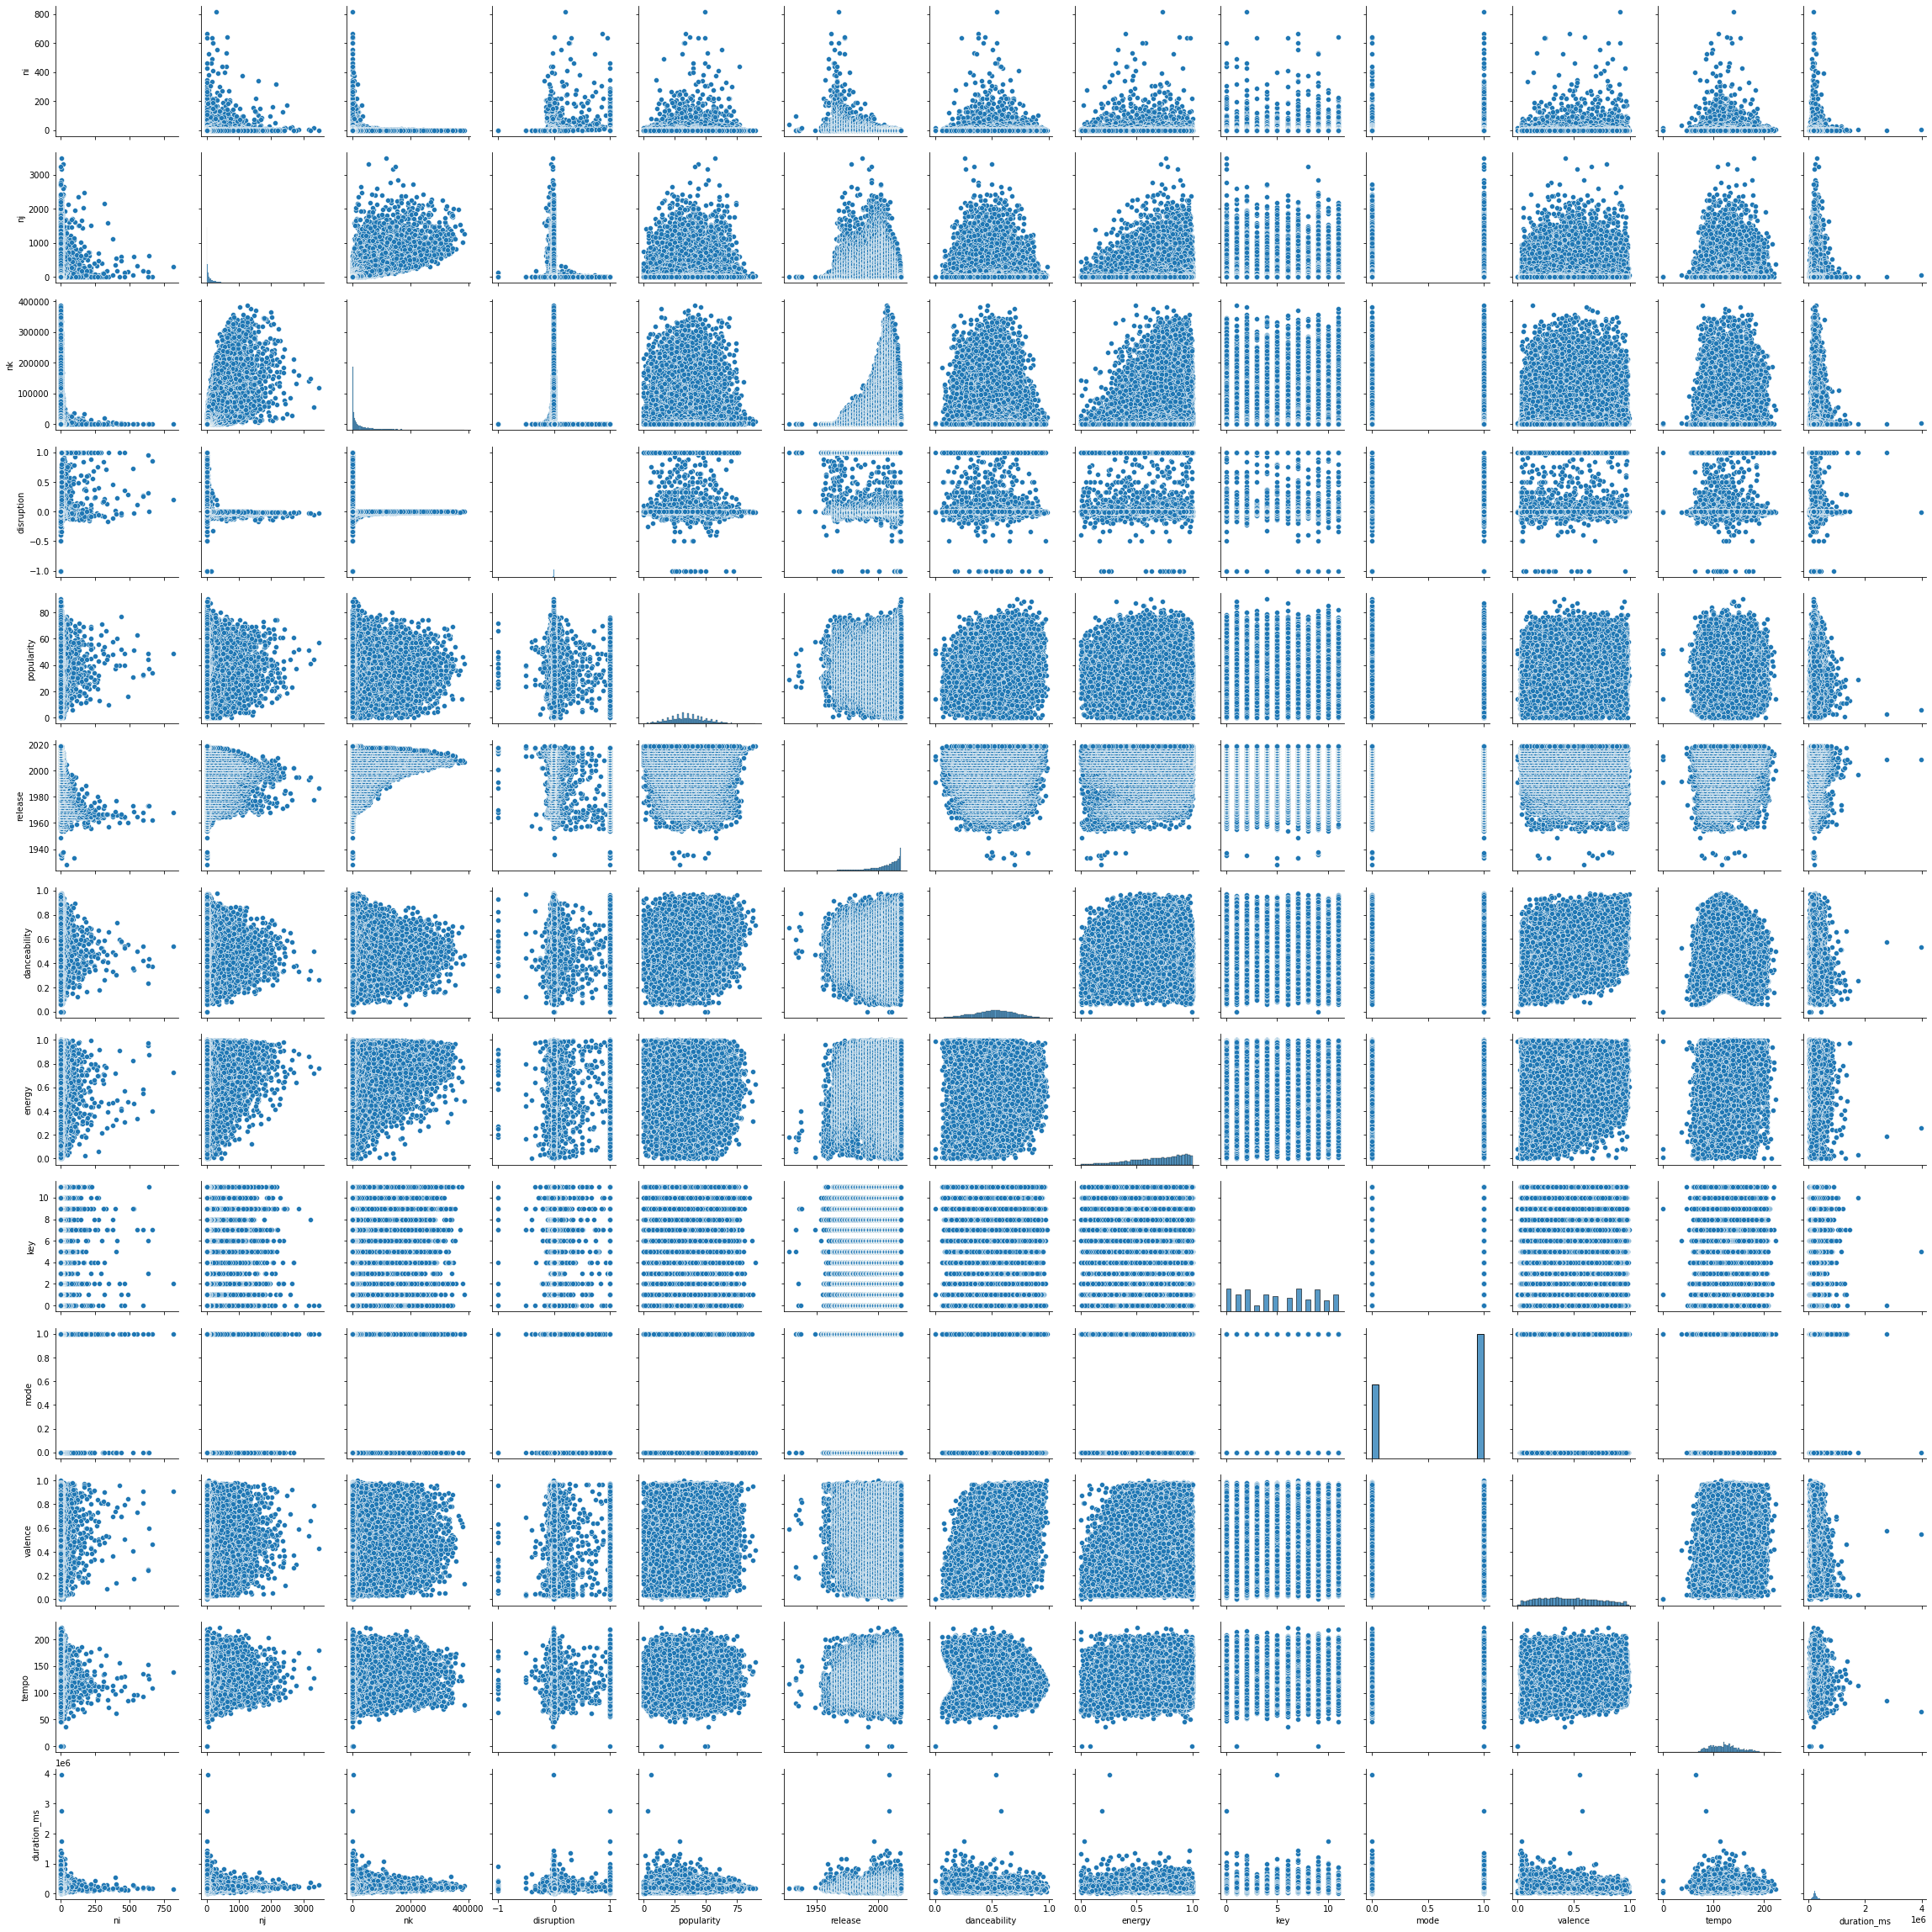

In [107]:
# Basic correlogram
sns.pairplot(df_with_disruption)

Transforming genres list into columns

In [122]:
fewer_columns = df_with_disruption[["id", "artist", "song", "release", "disruption"]]

In [118]:
genres_as_columns = df_with_disruption['genres'].str.get_dummies(sep=',')

Concatenating genres as columns to existing dataset

In [185]:
final = pd.concat([fewer_columns, genres_as_columns], axis=1)
final.head()

,id,artist,song,release,disruption,8-bit,a cappella,abstract,abstract hip hop,accordion,...,wave,west coast rap,witch house,wonky,world,worship,yacht rock,yoga,zeuhl,zouk
0,3MEb9LZbB80nQ1a8,Louis Armstrong,St. James Infirmary,1928,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1Z7Pb158yANCZ7zN,Billie Holiday,Georgia On My Mind,1933,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8rCzU7kVpoJ0Z37D,Billie Holiday,A Fine Romance,1933,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AHJbjIlp98gVY3Pj,Billie Holiday,Gloomy Sunday,1933,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1EhoPstBUguE4Btf,Fred Astaire,The Way You Look Tonight,1935,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using pearson correlation to find if there is a correlation between genre and disruption

In [173]:
genres_correlation_matrix = final.corr()
disruption_genres_pearson_corr = genres_correlation_matrix["disruption"].sort_values()
disruption_genres_pearson_corr = disruption_genres_pearson_corr[:] # -1 Removes the correlation with itself


### Most consolidating genres

<AxesSubplot:>

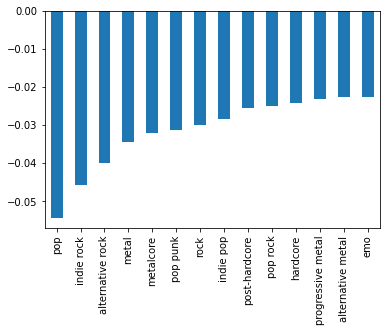

In [191]:
consolidating_genres = disruption_genres_pearson_corr[1:15]
consolidating_genres.plot.bar()

<AxesSubplot:>

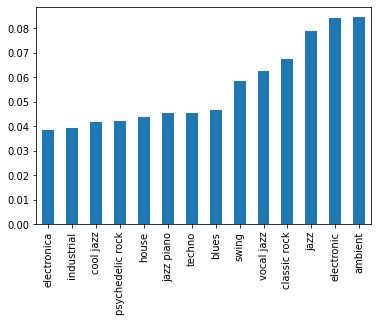

In [194]:
disruptive_genres    = disruption_genres_pearson_corr[-15:-1] # -1 remove disruption correlation with itself
disruptive_genres.plot.bar()

## There are genres that have a slightly lower or higher correlation, but they are all below abs(0.10), which is at best a weak or small correlation.

In [196]:
df_with_disruption[df_with_disruption.artist.str.contains("(?i)piaf")].sort_values(by=["disruption", "ni"],ascending=False)

,id,ni,nj,nk,disruption,artist,song,album_name,genres,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
3105,7B2jR20M7DJQnjzp,6.0,5.0,91.0,0.009804,Édith Piaf,"Non, je ne regrette rien",Eternelle,chanson,3dkIE8P7hvl3tHl9KSb6dA,59.0,1987,0.385,0.354,7.0,1.0,0.437,87.061,142280
15936,DJPtI0A5vovo8RZr,2.0,30.0,2285.0,-0.012085,Édith Piaf,Mon Dieu,Hymne à la môme (Best of),"chanson,chanson",1CWxN0drAnNbJAddtQuRfz,34.0,2013,0.289,0.347,9.0,1.0,0.107,97.216,226400


In [195]:
def num_of_genres(df):
    genres = ",".join(df['genres']).split(",")
    # That way we can count the occurrences of all genres in the dataframe
    genres_series = pd.Series(genres)
    unique_ones = genres_series.unique()
    rock = sum('rock' in s for s in unique_ones)
    pop = sum('pop' in s for s in unique_ones)
    jazz = sum('jazz' in s for s in unique_ones)
    print(f"Number of Rock Pop Jazz related Tags {rock, pop, jazz}")
    print(f"Number of unique genres in the dataset: {genres_series.nunique()}")

num_of_genres(df_with_disruption)
num_of_genres(datasets["id_genres"][:30000])
num_of_genres(datasets["id_genres"])

Number of Rock Pop Jazz related Tags (66, 67, 23)
Number of unique genres in the dataset: 625
Number of Rock Pop Jazz related Tags (67, 68, 23)
Number of unique genres in the dataset: 665
Number of Rock Pop Jazz related Tags (75, 79, 30)
Number of unique genres in the dataset: 853


In [ ]:
listening_history.describe()

,user,song,timestamp
count,5109592,5109592,5109592
unique,14127,99596,122340
top,user_Vrd41io2,32m5suoC94ytD8Ed,2019-02-08 20:35
freq,500,82871,175


In [56]:
all_users_history = listening_history.copy(deep=True)
all_users_history["timestamp"] = pd.to_datetime(all_users_history["timestamp"])

In [48]:
user_history = listening_history.query("user == 'user_007XIjOr'").sort_values(by=["timestamp"])

In [49]:
user_history["timestamp"] = pd.to_datetime(user_history["timestamp"])

In [50]:
user_history["time_diff"] = user_history["timestamp"].diff().dt.seconds.div(60, fill_value=0)

In [51]:
print(user_history.to_string())

              user              song           timestamp  time_diff
0    user_007XIjOr  DaTQ53TUmfP93FSr 2019-02-20 12:28:00        0.0
1    user_007XIjOr  dGeyvi5WCOjDU7da 2019-02-20 12:35:00        7.0
2    user_007XIjOr  qUm54NYOjeFhmKYx 2019-02-20 12:48:00       13.0
3    user_007XIjOr  FtnuMT1DlevSR2n5 2019-02-20 12:52:00        4.0
4    user_007XIjOr  LHETTZcSZLeaVOGh 2019-02-20 13:09:00       17.0
5    user_007XIjOr  LHETTZcSZLeaVOGh 2019-02-20 13:13:00        4.0
6    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:33:00       20.0
7    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:39:00        6.0
8    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:45:00        6.0
9    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:51:00        6.0
10   user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:58:00        7.0
11   user_007XIjOr  QDtAFWCvEaRwFPnC 2019-02-20 14:15:00       17.0
12   user_007XIjOr  MFVaxfkxZAUc4C8U 2019-02-20 14:20:00        5.0
13   user_007XIjOr  DhLocRBlCrB5ikDO 2019-02-20 

In [62]:
def get_cdf(df, field='time_diff'):
    res = {}
    for quantile in np.arange(0.0, 1,0.0005):
        res[quantile] = df[field].quantile(quantile)
    res_series = pd.DataFrame(pd.Series(res)).reset_index().set_index(0)
    return res_series

## Entendendo quanto tempo é uma sessão do usuário

<AxesSubplot:xlabel='0'>

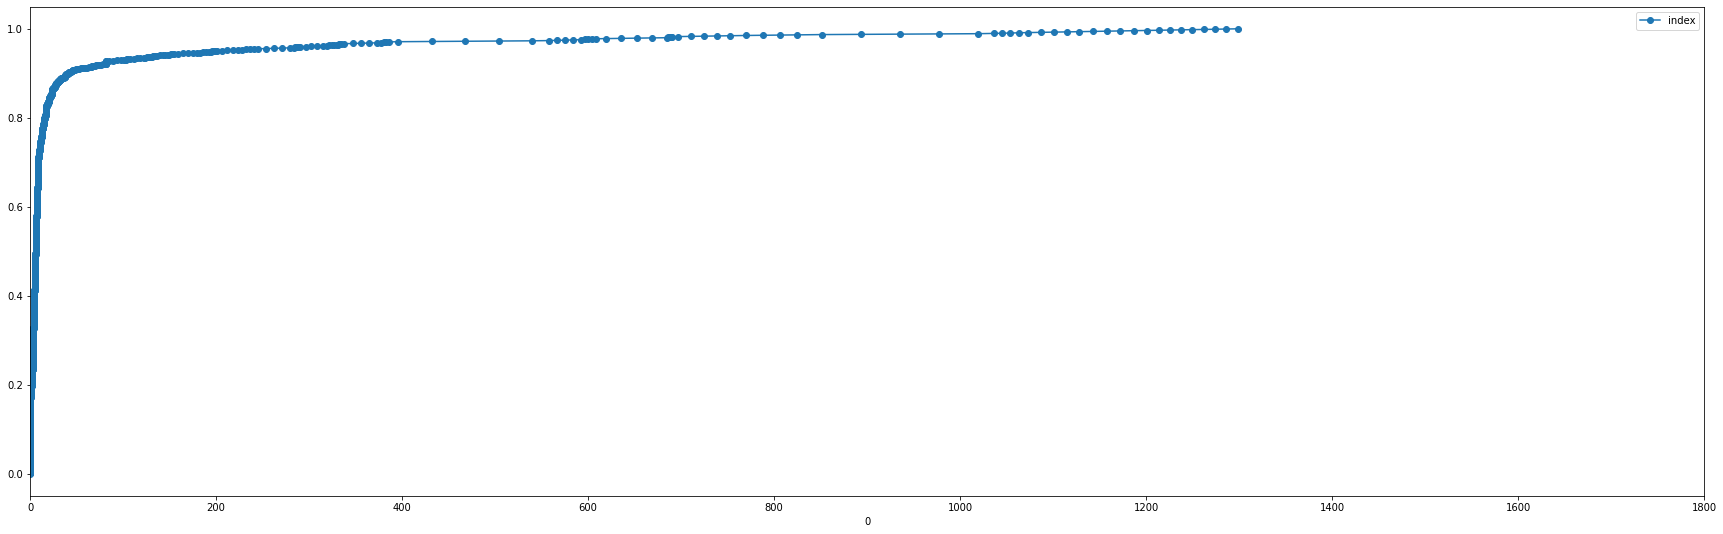

In [53]:
time_diff.plot(marker='o', figsize=(30,9), xlim=(0,1800))

In [57]:
sorted_user_history = all_users_history.sort_values(by=["user", "timestamp"])
sorted_user_history["new_user"] = sorted_user_history.user != sorted_user_history.user.shift()
sorted_user_history["time_diff"] = sorted_user_history["timestamp"].diff().dt.seconds.div(60, fill_value=0)
sorted_user_history.loc[sorted_user_history.new_user] = None

In [60]:
sorted_user_history.dropna()

,user,song,timestamp,new_user,time_diff
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35:00,0.0,7.0
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48:00,0.0,13.0
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52:00,0.0,4.0
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09:00,0.0,17.0
5,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:13:00,0.0,4.0
...,...,...,...,...,...
5109587,user_zzWscYTy,BBiswLufo26YQCT7,2019-01-10 15:57:00,0.0,9.0
5109588,user_zzWscYTy,5ZHgff3sjETIiedr,2019-01-10 16:21:00,0.0,24.0
5109589,user_zzWscYTy,m4O1iLh6fC43xjRy,2019-01-10 16:48:00,0.0,27.0
5109590,user_zzWscYTy,mvUaP8k67qOFfA65,2019-01-10 21:13:00,0.0,265.0


In [63]:
time_diff_all_users = get_cdf(sorted_user_history)

<AxesSubplot:xlabel='0'>

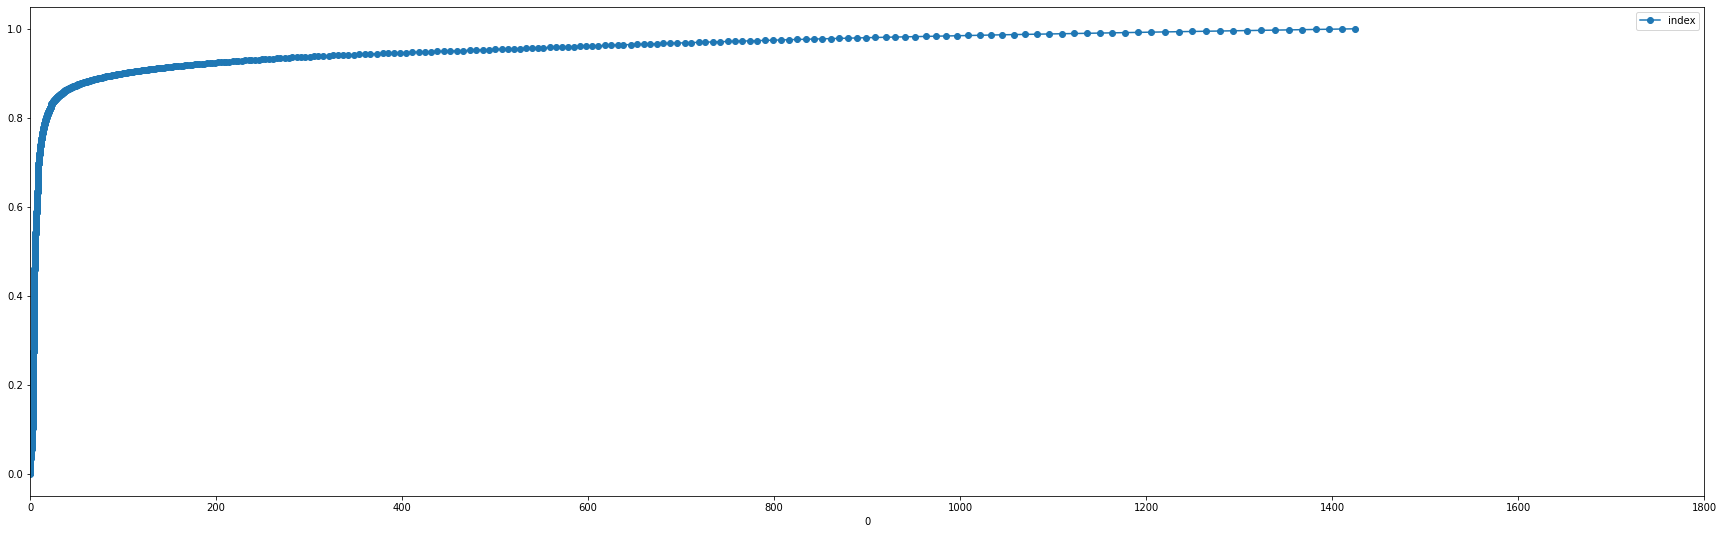

In [64]:
time_diff_all_users.plot(marker='o', figsize=(30,9), xlim=(0,1800))